**Titanic: Machine Learning from Disaster**

**Start here! Predict survival on the Titanic and get familiar with ML basics**

Website : https://www.kaggle.com/c/titanic/data


In [21]:
# General utility packages ---------------------------
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data 

# Machine Learning related packages ----------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [22]:
data_init = pd.read_csv('train.csv') # read the train data in data DataFrame
test_data = pd.read_csv('test.csv') #read the test data
sol = pd.read_csv('gender_submission.csv') #read the solutions

test_data['Survived']=sol['Survived'] #adding the solution to the test set 

In [23]:
data=(data_init.append(test_data)) #it is formed by appending the test and train data 
data.head()  #Reading the data to check the header


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [24]:
data.describe() #used to check if there are missing values

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.377387
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.484918
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [25]:
#fill the NaN value
data['Age'].fillna(data['Age'].median(),inplace=True)
data.Cabin.fillna('U',inplace=True)
data.Embarked.fillna('S',inplace=True)
data.Fare.fillna(data.Fare.mean(),inplace=True)
data.Age.fillna(data.Age.median(), inplace=True)

**VISUALISING THE DATA**

**1. Sex versus Survival**

          male  female
Total      843     466
Survived   109     385
Died       734      81


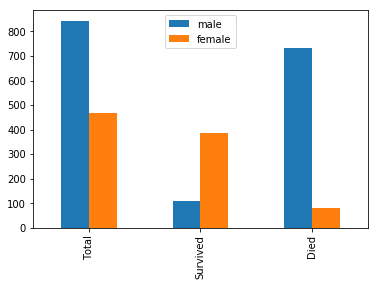

In [26]:
total = data['Sex'].value_counts()
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
died_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([total,survived_sex,died_sex])
df.index = ['Total','Survived','Died']
print(df)
df.plot(kind='bar')

**2. Age vs Survival**

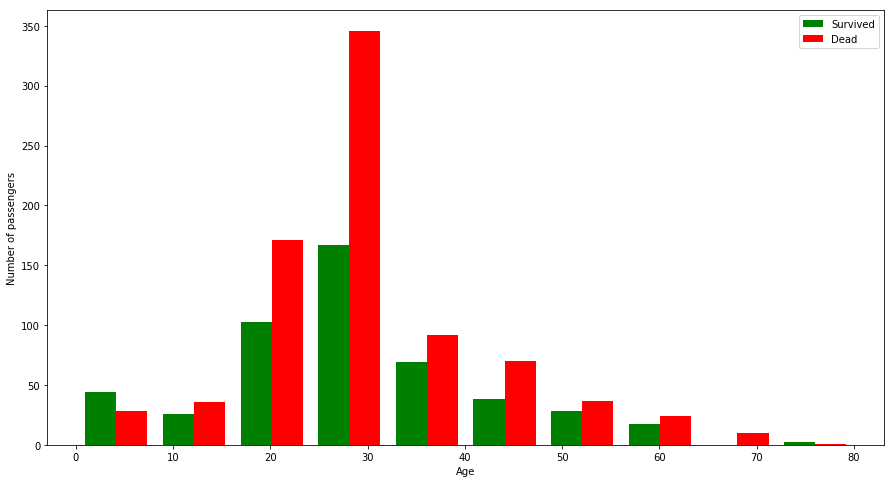

In [27]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

**3. Class versus Survival**

             0    1  total
1st class  137  186    323
2nd class  160  117    277
3rd class  518  191    709


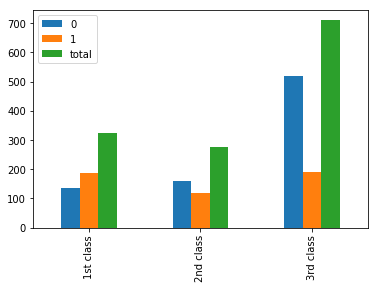

In [28]:
survived_1 = data[data['Pclass']==1]['Survived'].value_counts()
survived_2 = data[data['Pclass']==2]['Survived'].value_counts()
survived_3 = data[data['Pclass']==3]['Survived'].value_counts()
df = pd.DataFrame([survived_1,survived_2,survived_3])
df['total']=df[0]+df[1]
df.index = ['1st class','2nd class','3rd class']
df.rename(index=str,columns={0:'Survived',1:'Died'})
print (df)
df.plot(kind='bar',label=['Survived','Died'])

**4. Fare versus Survival**

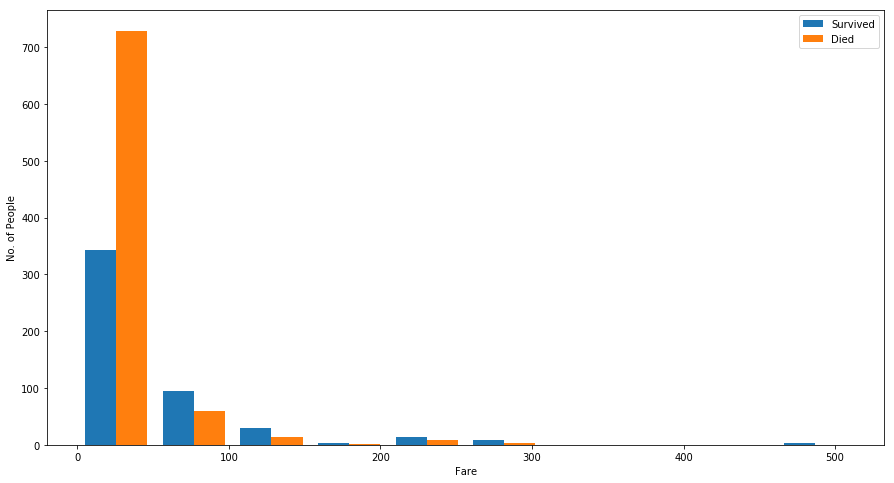

In [29]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],bins=10,label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.legend()

In [32]:
survival_embarkment = data[data['Survived']==1]['Embarked'].value_counts()
died_embarkment = data[data['Survived']==0]['Embarked'].value_counts()

In [33]:
survival_embarkment

S    307
C    133
Q     54
Name: Embarked, dtype: int64

In [34]:
died_embarkment

S    609
C    137
Q     69
Name: Embarked, dtype: int64

In [36]:
df = pd.DataFrame([survival_embarkment, died_embarkment])

In [37]:
df.index= ["Survived", "Died"]

In [38]:
df

,S,C,Q
Survived,307,133,54
Died,609,137,69


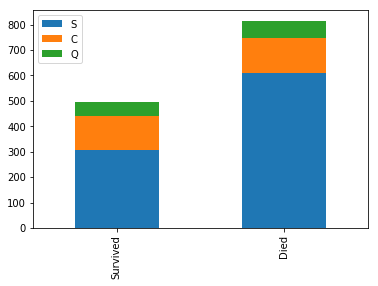

In [41]:
df.plot(kind = "bar", stacked = True)

In [42]:
data_set = data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Cabin']]


In [43]:
data_set.head()

,Pclass,Sex,Age,Fare,SibSp,Cabin
0,3,male,22.0,7.2500,1,U
1,1,female,38.0,71.2833,1,C85
2,3,female,26.0,7.9250,0,U
3,1,female,35.0,53.1000,1,C123
4,3,male,35.0,8.0500,0,U


In [45]:
one_hot_encoded_training_predictors = pd.get_dummies(data_set)

In [47]:
one_hot_encoded_training_predictors.head()

,Pclass,Age,Fare,SibSp,Sex_female,Sex_male,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U
0,3,22.0,7.2500,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,35.0,8.0500,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
X = one_hot_encoded_training_predictors

In [49]:
y = data['Survived']

In [55]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [56]:
logreg = LogisticRegression()

In [57]:
logreg.fit(X_train, y_train)

C:\Users\Nikunj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
y_pred = logreg.predict(X_test)

In [60]:
logreg.score(X_test, y_test)*100

85.41666666666666